1. There are some categorical data in this dataset. Label encoder has been used to encode categorical data.
2. Split data into training and test sets
3. Normalized data using Standard Scaler
4. Fit and predict results using Naive Bayes Classifier
5. Evaluate result using confusion matrix and prediction accuracy is calculated

In [1]:
#1 import necessary library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#2 import dataset in file

ds = pd.read_csv('student-mat.csv')
pd.set_option('display.max_columns',100)
ds.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [3]:
#3 check info for dataset

ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
4# Input relevant attributes input and output

x = ds.iloc[:,[2,19,26,27]].values
y = ds.iloc[:,20].values

x,y

(array([[18, 'yes', 1, 1],
        [17, 'no', 1, 1],
        [15, 'yes', 2, 3],
        ...,
        [21, 'no', 3, 3],
        [18, 'no', 3, 4],
        [19, 'yes', 3, 3]], dtype=object),
 array(['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
        'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
        'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
        'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
        'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
        'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
        'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
        'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
        'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes',
        'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
        'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
        'yes', 'yes', 'yes', 'ye

In [5]:
#5 Label encoder to encode categorical data

from sklearn.preprocessing import LabelEncoder

labelencoder_x = LabelEncoder() #create label encoder new data

x[:,1] = labelencoder_x.fit_transform(x[:,0])

labelencoder_y = LabelEncoder()

y = labelencoder_y.fit_transform(y)

x,y

(array([[18, 3, 1, 1],
        [17, 2, 1, 1],
        [15, 0, 2, 3],
        ...,
        [21, 6, 3, 3],
        [18, 3, 3, 4],
        [19, 4, 3, 3]], dtype=object),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1,

In [6]:
#6 Splitting the datasets into training and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)


In [7]:
#7 Normalize data

from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

x_train=ss.fit_transform(x_train)

x_test=ss.transform(x_test)

In [8]:
#8 Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x,y)

GaussianNB()

In [9]:
y_pred=classifier.predict(x_test)

In [10]:
y_test, y_pred

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [11]:
#9 Making Confusion Matrix – to check whether the test set gives the correct result

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)

cm

array([[ 0,  5],
       [ 0, 74]], dtype=int64)

In [12]:
#10 Accuracy prediction

accuracy = (74+0)/(74+5+0+0)

print('accuracy result:', accuracy)

accuracy result: 0.9367088607594937


In [13]:
#11 see classification report to check the accuracy result

from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.94      1.00      0.97        74

    accuracy                           0.94        79
   macro avg       0.47      0.50      0.48        79
weighted avg       0.88      0.94      0.91        79



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Based on the findings, we can conclude that the results is quite reasonable which is near to 1 (0.93) by using Naive Bayes

1. Predict the final grade (G3) based on first (G1) and second (G2) by using Multiple Linear Regression
2. Split data into training and test sets with the appropriate proportions
3. Fit and predict results using the Multiple Linear Regression
4. Using graphical visualizations to compare your predicted results vs the actual results in a scatter plot

In [14]:
#1 import necessary library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
2# input dataset in file

ds = pd.read_csv('student-mat.csv')
ds

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [16]:
#3 check info for dataset

ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [17]:
#4 Input relevant attributes input and output

x = ds.iloc[:,[30,31]].values
y = ds.iloc[:,-1].values

x,y

(array([[ 5,  6],
        [ 5,  5],
        [ 7,  8],
        [15, 14],
        [ 6, 10],
        [15, 15],
        [12, 12],
        [ 6,  5],
        [16, 18],
        [14, 15],
        [10,  8],
        [10, 12],
        [14, 14],
        [10, 10],
        [14, 16],
        [14, 14],
        [13, 14],
        [ 8, 10],
        [ 6,  5],
        [ 8, 10],
        [13, 14],
        [12, 15],
        [15, 15],
        [13, 13],
        [10,  9],
        [ 6,  9],
        [12, 12],
        [15, 16],
        [11, 11],
        [10, 12],
        [ 9, 11],
        [17, 16],
        [17, 16],
        [ 8, 10],
        [12, 14],
        [ 8,  7],
        [15, 16],
        [15, 16],
        [12, 12],
        [14, 13],
        [ 7, 10],
        [12, 12],
        [19, 18],
        [ 8,  8],
        [10, 10],
        [ 8,  8],
        [11, 12],
        [19, 19],
        [15, 15],
        [ 7,  7],
        [12, 13],
        [11, 13],
        [11, 11],
        [ 8, 10],
        [10, 13],
        [ 

In [18]:
#5 splitting the dataset into training and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [19]:
#6 Fitting simple linear regression into training set

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(x_train,y_train)

LinearRegression()

In [20]:
#7 Predicting result from the test set

y_pred = regressor.predict(x_test)

y_pred, y_test

(array([14.16500148, 10.86251072,  9.6665941 , 15.3609181 , 16.27157561,
        12.05842735, 12.96908486, 10.76742435,  8.56576384, 15.3609181 ,
         7.56001996, 11.8682546 , 10.86251072,  7.46493359, 15.17074536,
        14.16500148, 12.77891211,  9.6665941 ,  8.75593659, 15.17074536,
         6.36410334,  4.35261558,  6.45918971, 15.07565899, 11.96334097,
        16.27157561,  9.6665941 , 19.57406637, -0.20067197, 12.77891211,
        -0.7711902 ,  7.56001996,  7.65510633,  5.35835946, 13.1592576 ,
         9.95185321, 12.77891211, 18.47323612,  8.56576384, 11.96334097,
         4.2575292 , 18.56832249,  7.65510633,  8.47067747,  9.76168047,
        -0.7711902 , 11.8682546 ,  4.35261558, 11.96334097,  7.27476085,
         8.85102296, 18.37814975, 10.86251072,  7.75019271, 11.96334097,
         7.56001996,  8.85102296, 12.96908486, 15.07565899, 14.06991511,
        13.06417123, 13.25434397, 14.16500148, 15.45600448,  8.75593659,
        15.26583173, 18.56832249, 12.24860009,  4.3

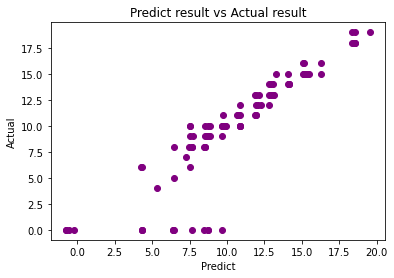

In [21]:
#8 Visualizations plotting scatter

plt.scatter(y_pred, y_test, color='purple')
plt.title('Predict result vs Actual result')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

In [22]:
#9 check correlation between prediction and actual test result

Corr = np.corrcoef(y_test,y_pred)
print(Corr)

[[1.         0.89212379]
 [0.89212379 1.        ]]


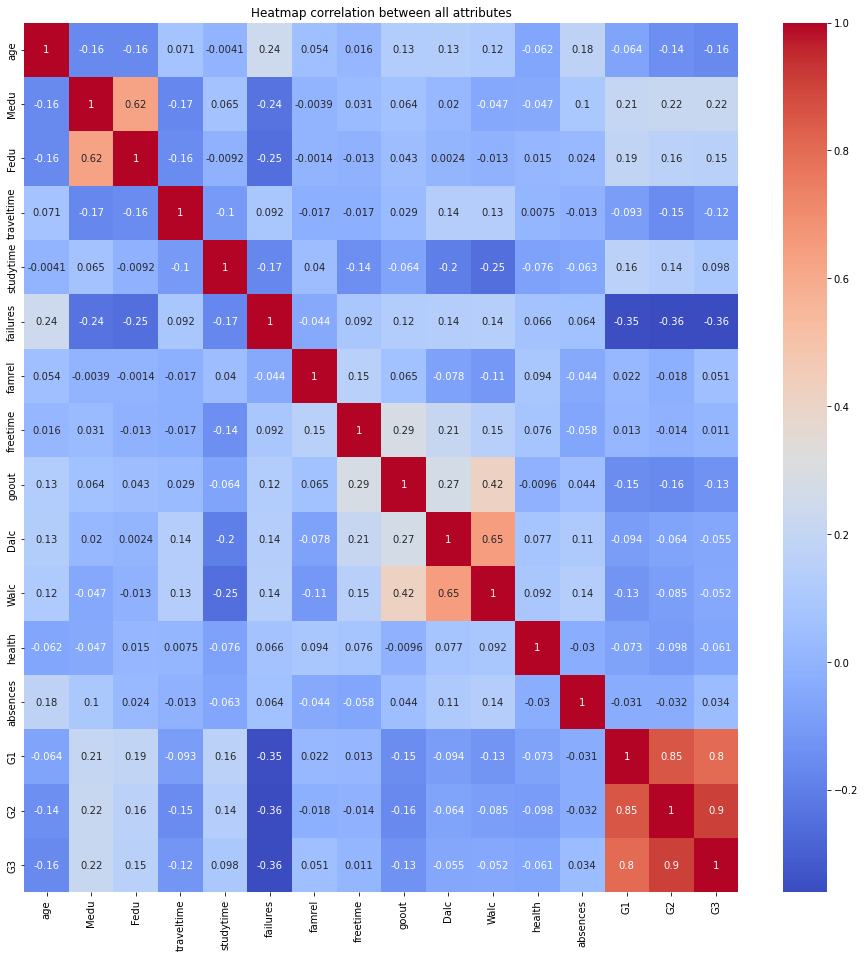

In [23]:
#9 import seaborn to identify area

import seaborn as sns

plt.figure(figsize=(16,16))
sns.heatmap(ds.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap correlation between all attributes')
plt.show()

Based on multiple linear regression, the results have been obtained for total which is 0.89 correlate to the actual which is in the heatmap shown.
G1 and G2 is 0.8 and 0.9 respectively is correlate to G3 (1). 